In [112]:
import pandas as pd
import numpy as np
all_indices = pd.read_csv('./Dataset/all_indices.csv')
all_indices = all_indices.rename(columns = {"Date":"Attributions","Time Series":"Tickers"})
all_indices = all_indices.set_index(["Tickers","Attributions"])
all_indices.columns = pd.to_datetime(all_indices.columns)
all_indices = all_indices.fillna(axis = 1, method='bfill')
all_indices = all_indices.replace({',':''},regex=True).apply(pd.to_numeric,axis=1)


<Axes: >

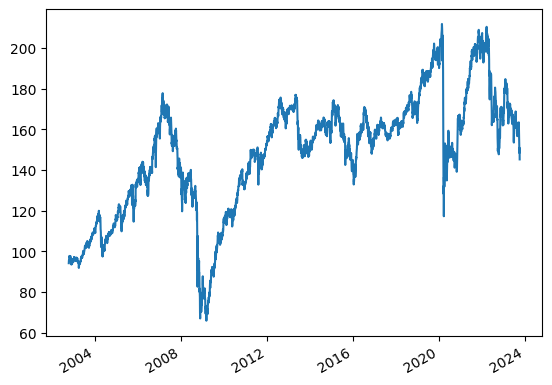

In [113]:
#all_indices = all_indices.dropna(axis=1)
all_indices.loc['$RTRE'].loc['Open'].plot()

In [120]:
tickers = all_indices.index.get_level_values(0).unique().to_list()

In [128]:
close = {}
calcs = {}
def all_close(ticker):
    return pd.DataFrame(all_indices.loc[ticker,'Close'][::-1]).dropna()
for ticker in tickers:
    close["{0}".format(ticker)] = all_close(ticker)
    close[ticker][ticker,'Daily Return'] = close[ticker].pct_change(1)
    calcs["{0}_AnnualReturn".format(ticker)] = np.mean(close[ticker][ticker,'Daily Return'])*100*30*12


In [129]:
close[tickers[5]]


$TTFS             
             Close Daily Return
2001-01-05  106.97          NaN
2001-01-08  106.36    -0.005703
2001-01-09  104.79    -0.014761
2001-01-10  104.84     0.000477
2001-01-11  105.90     0.010111
...            ...          ...
2023-09-27  341.78    -0.012025
2023-09-28  345.54     0.011001
2023-09-29  343.78    -0.005093
2023-10-02  337.50    -0.018267
2023-10-03  332.54    -0.014696

[5715 rows x 2 columns]

In [130]:
calcs

{'$RTRE_AnnualReturn': 4.789996922703322,
 '$TOOC_AnnualReturn': 8.216675584929412,
 '$TTCD_AnnualReturn': 8.391656336030373,
 '$TTCS_AnnualReturn': 12.039461895913504,
 '$TTEN_AnnualReturn': 13.149100615207677,
 '$TTFS_AnnualReturn': 9.700053503963167,
 '$TTHC_AnnualReturn': -1.7676705141013147,
 '$TTIN_AnnualReturn': 11.928328140680918,
 '$TTMT_AnnualReturn': 11.25354079135662,
 '$TTRE_AnnualReturn': 7.9608951203124105,
 '$TTTK_AnnualReturn': 12.92193552241981,
 '$TTTS_AnnualReturn': 9.919790142632564,
 '$TTUT_AnnualReturn': 5.748088309526648,
 '$TXCI_AnnualReturn': 8.691243880287193}